# Minor Project
## Predicting Price for Used Vehicles

---
In this project we are trying to predict the price of used card based on a dataset containing prices of several used cars.

### Step 1: Performing Exploratory Data Analysis on the given dataset

---
We import the required library and dataset and create a DataFrame 'df_vehicle'

In [44]:
# Importing required libraries
import pandas as pd

# Loading the dataset
df_vehicle = pd.read_csv('vehicle_dataset.csv')

Take a look at the shape of our data to have a general idea about its size

In [45]:
# Displaying the shape and size of the dataset
print("Shape of the dataset: ", df_vehicle.shape)
print("Size of the dataset: ", df_vehicle.size)

Shape of the dataset:  (301, 9)
Size of the dataset:  2709


Take a look at the columns in our data

In [46]:
# Displaying the column names for the dataset
df_vehicle.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

Take a look at the dataset

In [47]:
# Displaying the top 5 rows from the dataset
df_vehicle.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Take a look at unique values from each column having categorical value

In [48]:
# Displaying unique values in each columns
print("Unique values for Seller Type:     ", df_vehicle['Seller_Type'].unique())
print("Unique values for Fuel Type:       ", df_vehicle['Fuel_Type'].unique())
print("Unique values for Transmission:    ", df_vehicle['Transmission'].unique())
print("Unique values for Previous owners: ", df_vehicle['Owner'].unique())

Unique values for Seller Type:      ['Dealer' 'Individual']
Unique values for Fuel Type:        ['Petrol' 'Diesel' 'CNG']
Unique values for Transmission:     ['Manual' 'Automatic']
Unique values for Previous owners:  [0 1 3]


Take a look at the total count of NULL values from each column

In [49]:
# Checking for missing values in each column
df_vehicle.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Descriptive statistics of the dataframe

In [50]:
# Statistical description of the dataset
df_vehicle.describe(include = "all")

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


### Step 2: Cleaning the data to make it ready for further steps

---
Selecting the required features from the dataset

In [51]:
# Selecting required features for the final dataset
final_dataset = df_vehicle[['Year',
                            'Selling_Price',
                            'Present_Price',
                            'Kms_Driven',
                            'Fuel_Type',
                            'Seller_Type',
                            'Transmission',
                            'Owner'
                           ]]

# Displaying top 5 columns of the final_dataset
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Inserting a new column in the dataset with current year as 2020

In [52]:
# Sorting the dataset having current year as 2020
final_dataset['Current Year'] = 2020

# Displaying the dataset after sorting
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


Calculating the total number of years the car been owned for by subtracting the year of buing (year) from current year

In [53]:
# Finding the number of years after the release of the vehicle
final_dataset['no_year'] = final_dataset['Current Year'] - final_dataset['Year']

# Displaying the top 5 values from the dataset
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


Dropping the year column

In [54]:
# Dropping the release year column as we dont need it now
final_dataset.drop(['Year'], axis = 1, inplace = True)

# Displaying the top 5 values from the dataset
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


Converting the categorical variables to dummy/indicator variables

In [55]:
# Setting dummy values for the features
final_dataset = pd.get_dummies(final_dataset, drop_first = True)

# Displaying the top 5 rows with dummy values
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current Year,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2020,6,0,1,0,1
1,4.75,9.54,43000,0,2020,7,1,0,0,1
2,7.25,9.85,6900,0,2020,3,0,1,0,1
3,2.85,4.15,5200,0,2020,9,0,1,0,1
4,4.60,6.87,42450,0,2020,6,1,0,0,1


Dropping the current year column that we used for calculating the total number of years

In [56]:
# Dropping the Current Year column from the dataset
final_dataset = final_dataset.drop(['Current Year'], axis = 1)

# Displaying the top 5 rows of the modifies dataset
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


Computing pairwise correlation of columns excluding the NA/NULL values

In [57]:
# Creating a correlational table for the final variables
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


### Sep 3: Plotting graphs for better understanding of the data

---
Importing the required libraries

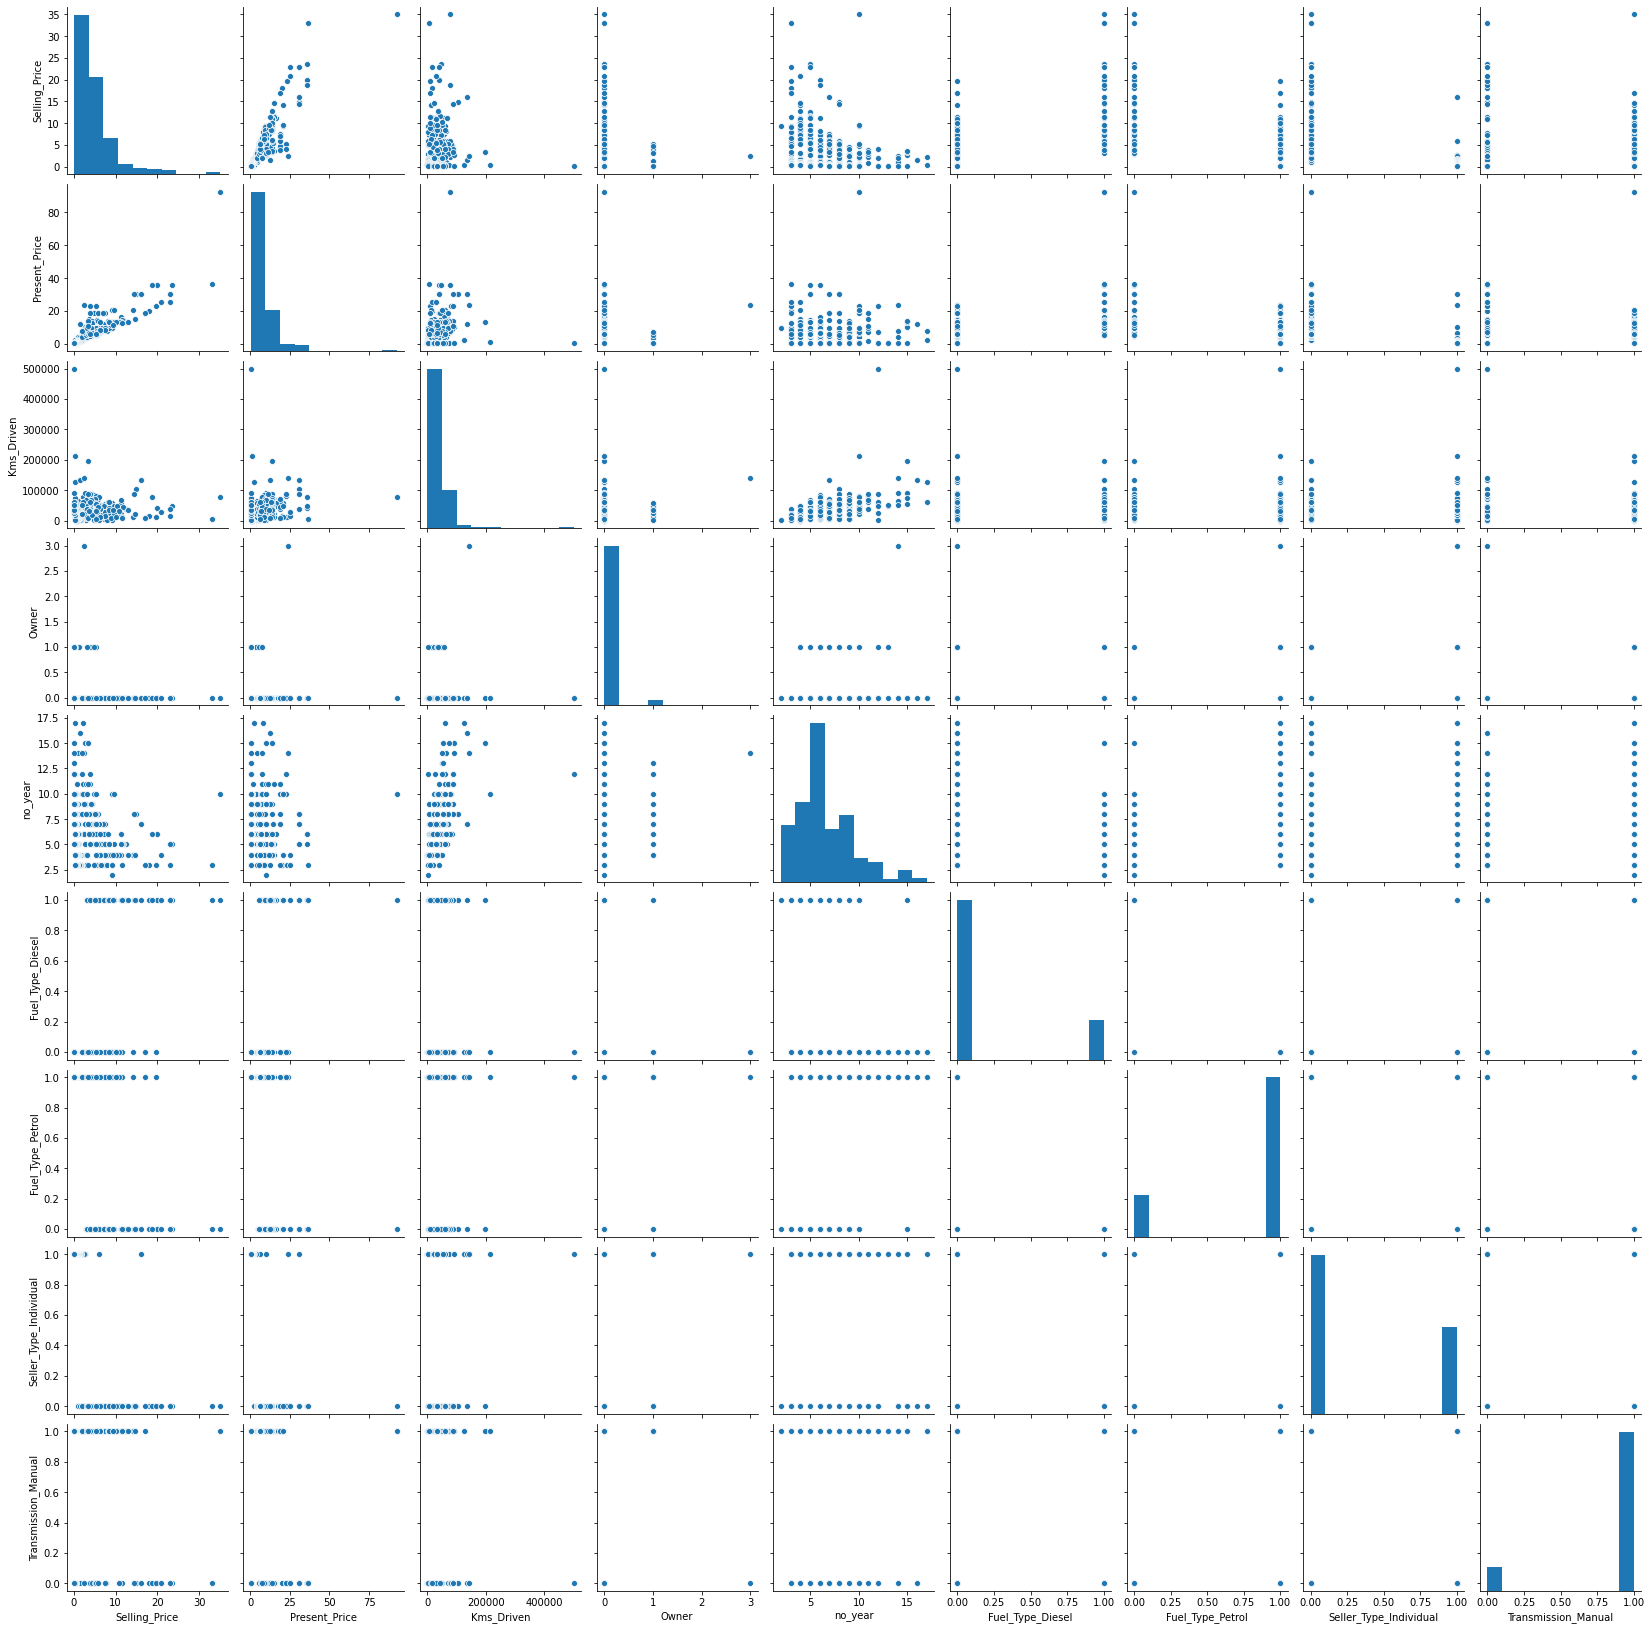

In [58]:
# Importing seaborn for plotting graphs
import seaborn as sns

# Plotting a pairplot for the final variables
sns.pairplot(final_dataset)

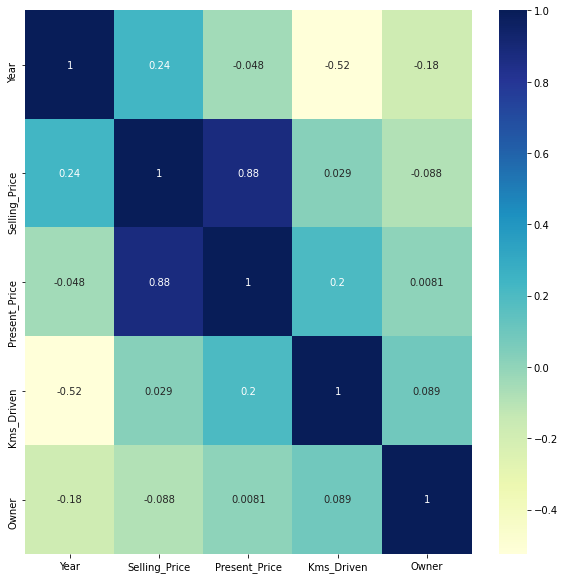

In [59]:
# Importing matplotlib for plotting 
import matplotlib.pyplot as plt

# Get correlations of each features in dataset
corrmat = df_vehicle.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (10, 10))

# Plotting the heat map
g = sns.heatmap(df_vehicle[top_corr_features].corr(), 
                annot = True, 
                cmap = "YlGnBu")

### Step 4: Machine Learning starts here

In [60]:
# Seperating dataset for fitting the model
X = final_dataset.iloc[:, 1:]
y = final_dataset.iloc[:, 0]

# Displaying the unique values of total owners of the vehicle
X['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [61]:
# Displaying the top 5 rows of the new dataset
X.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [62]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [63]:
# Importing the required libraries
from sklearn.ensemble import ExtraTreesRegressor

# Creating an Regressor Model
model = ExtraTreesRegressor()

# Fitting the model
model.fit(X, y)

# Displaying the feature importance array
print(model.feature_importances_)

[0.39862208 0.04217625 0.00041253 0.07492564 0.21556288 0.01694169
 0.11664581 0.13471312]


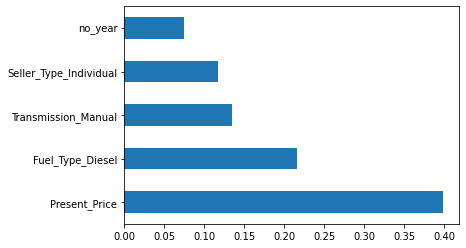

In [64]:
# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(5).plot(kind = 'barh')
plt.show()

In [65]:
# Importing the library to split the data into train and test sets
from sklearn.model_selection import train_test_split

# Beginning the splitting of data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Importing the library for Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# Creating a Random Forest Regression model
regressor = RandomForestRegressor()

In [66]:
# Importing Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [67]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Printing the Random Grid
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [68]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Creating a Random Forest Regression model
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid,
                               scoring = 'neg_mean_squared_error', 
                               n_iter = 10, 
                               cv = 5, 
                               verbose = 2, 
                               random_state = 42, 
                               n_jobs = 1)

# Fitting a Random Forest Regression Model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.1s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   37.3s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

### Step 5: Analysing the model

In [69]:
# Displaying the best paramenters for the Regression
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [70]:
# Displaying the best score for the Regression
rf_random.best_score_

-3.9593525527614433

<AxesSubplot:xlabel='Selling_Price'>

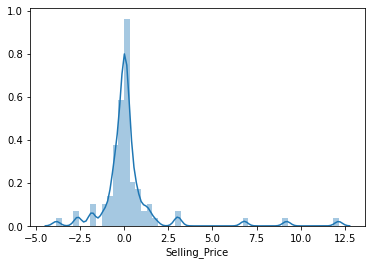

In [71]:
# Predicting on the test dataset
predictions = rf_random.predict(X_test)

# Distribution plot for the predictions
sns.distplot(y_test-predictions)

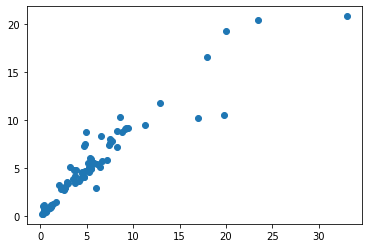

In [72]:
# Scatter plot for the predictions
plt.scatter(y_test, predictions)

In [73]:
# Importing libraries to calculate the metrics
from sklearn import metrics

# Displaying the metrics for the analysis
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8845173626373602
MSE: 3.967083054316482
RMSE: 1.9917537634749136


### Step 6: Serializing the object structure

In [74]:
#importing required library
import pickle

#open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

#dump information to that file
pickle.dump(rf_random, file)